In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import scipy
import talib

from tqdm.notebook import tqdm
plt.rcParams["figure.figsize"] = (20, 10)

# BitMEX API [Docs](https://docs.bitmex.com/api-explorer/get-trade-bucketed)

Lets fetch some historical OHLC data

In [5]:
sym = 'ETHUSD'

url = f'https://www.bitmex.com/api/v1/trade/bucketed?binSize=1m&partial=true&symbol={sym}&count=1000&reverse=true'

data = requests.get(url).json()

rows = []
rows.extend(data)

i = 0

while i < 10:
    endtime = data[-1]['timestamp']
    data = requests.get(url + f'&endTime={endtime}').json()
    rows.extend(data)
    i += 1


cf = pd.DataFrame(rows)
cf = cf.sort_values('timestamp').drop_duplicates().reset_index(drop=True)

logret = np.log(cf['close'].shift(-1)) - np.log(cf['close'])

cf['logret'] = logret
cf['abs_logret'] = abs(logret)

cf

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,logret,abs_logret
0,2025-09-12T01:31:00.000Z,ETHUSD,4525.47,4527.06,4525.20,4525.20,6,25,4525.95,3.0,11314860,2.893519,13095.902778,-0.000312,0.000312
1,2025-09-12T01:32:00.000Z,ETHUSD,4525.20,4524.07,4522.18,4523.79,12,74,4523.17,3.0,33471403,8.564815,38740.049769,-0.000838,0.000838
2,2025-09-12T01:33:00.000Z,ETHUSD,4523.79,4522.22,4520.00,4520.00,8,22,4520.97,1.0,9946111,2.546296,11511.702546,-0.000589,0.000589
3,2025-09-12T01:34:00.000Z,ETHUSD,4520.00,4519.43,4517.34,4517.34,8,72,4518.40,2.0,32532408,8.333333,37653.250000,-0.000974,0.000974
4,2025-09-12T01:35:00.000Z,ETHUSD,4517.34,4517.86,4512.94,4512.94,6,58,4515.61,10.0,26190450,6.705202,30277.976879,0.000439,0.000439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10985,2025-09-19T16:36:00.000Z,ETHUSD,4482.20,4489.30,4489.30,4489.30,8,22,4489.30,3.0,9876460,2.552204,11457.610209,-0.000809,0.000809
10986,2025-09-19T16:37:00.000Z,ETHUSD,4489.30,4488.66,4485.56,4485.67,21,190,4486.86,21.0,85250066,22.041763,98897.988399,-0.000825,0.000825
10987,2025-09-19T16:38:00.000Z,ETHUSD,4485.67,4484.15,4481.97,4481.97,5,15,4483.09,1.0,6724619,1.740139,7801.182135,0.000000,0.000000
10988,2025-09-19T16:39:00.000Z,ETHUSD,4481.97,4481.97,4481.97,4481.97,0,0,NaN,NaN,0,0.000000,0.000000,0.000620,0.000620


<Axes: ylabel='Frequency'>

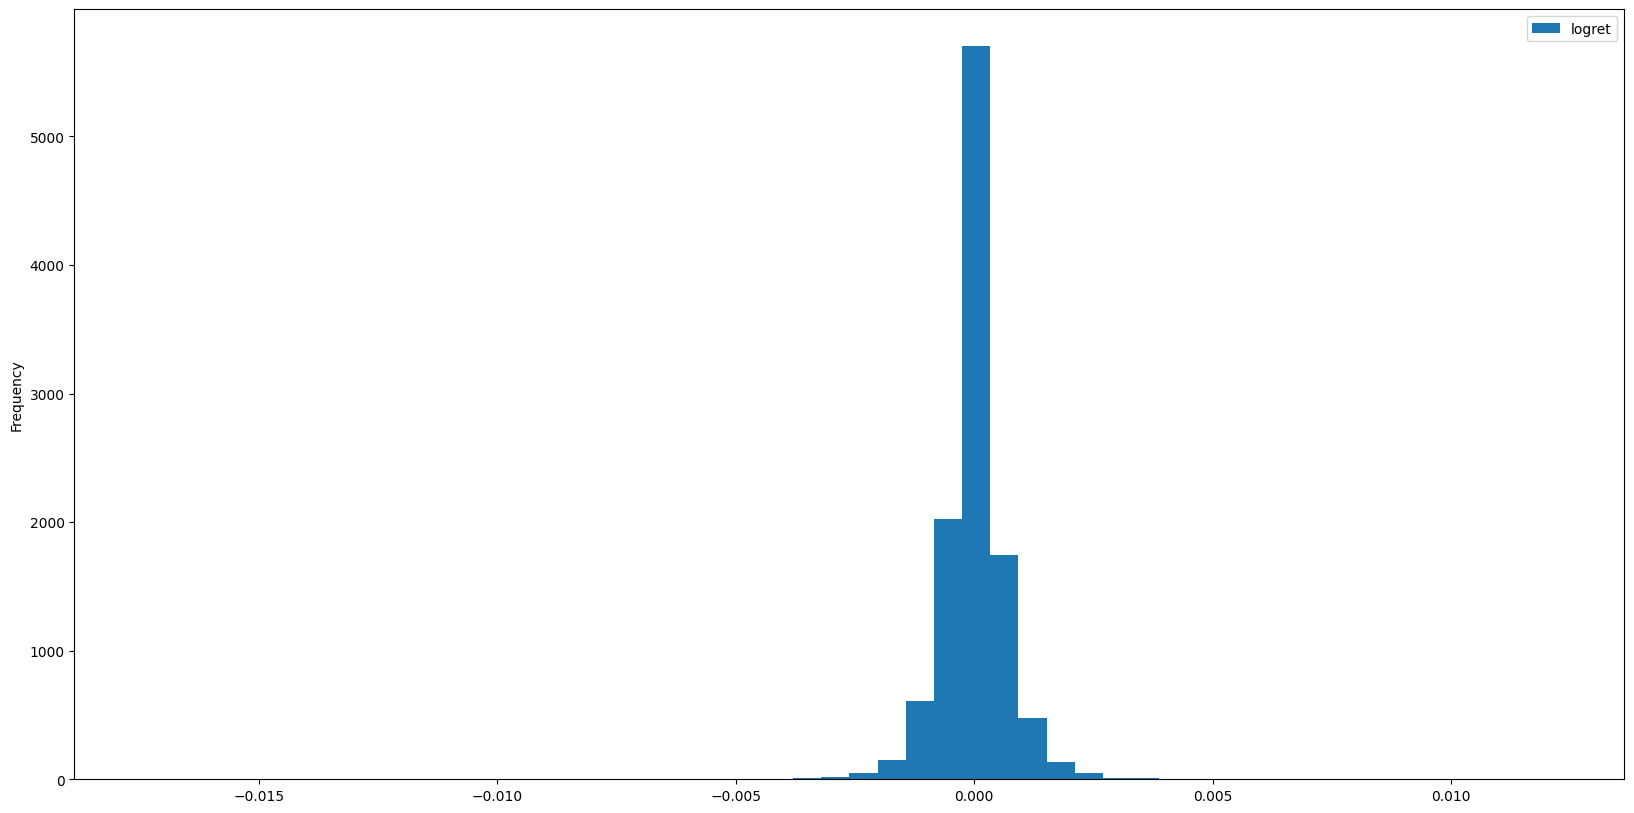

In [6]:
cf.plot(y='logret', kind='hist', bins=50)

In [7]:
cf.sort_values('abs_logret', ascending=False)

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,logret,abs_logret
8188,2025-09-17T17:59:00.000Z,ETHUSD,4521.54,4520.11,4516.33,4517.69,32,330,4519.27,1.0,149135630,38.327526,1.732121e+05,-0.017387,0.017387
8189,2025-09-17T18:00:00.000Z,ETHUSD,4517.69,4537.63,4437.64,4439.82,385,4354,4491.79,1.0,1955720962,505.478306,2.270489e+06,0.012158,0.012158
4711,2025-09-15T08:02:00.000Z,ETHUSD,4598.07,4596.69,4582.73,4587.70,122,1355,4589.51,1.0,621877401,157.010429,7.205995e+05,-0.007768,0.007768
2180,2025-09-13T13:51:00.000Z,ETHUSD,4711.32,4710.51,4689.10,4689.67,73,399,4699.90,2.0,187525762,46.234067,2.172952e+05,-0.006808,0.006808
1250,2025-09-12T22:21:00.000Z,ETHUSD,4694.52,4700.50,4692.80,4697.13,47,169,4696.34,1.0,79367952,19.651163,9.228832e+04,0.006407,0.006407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2025-09-13T13:26:00.000Z,ETHUSD,4725.70,4725.70,4725.70,4725.70,0,0,NaN,NaN,0,0.000000,0.000000e+00,0.000000,0.000000
4216,2025-09-14T23:47:00.000Z,ETHUSD,4605.84,4604.85,4603.96,4603.96,12,67,4603.99,40.0,30846710,7.719160,3.553891e+04,0.000000,0.000000
2710,2025-09-13T22:41:00.000Z,ETHUSD,4652.96,4652.96,4652.96,4652.96,0,0,NaN,NaN,0,0.000000,0.000000e+00,0.000000,0.000000
5471,2025-09-15T20:42:00.000Z,ETHUSD,4514.51,4514.51,4514.51,4514.51,0,0,NaN,NaN,0,0.000000,0.000000e+00,0.000000,0.000000


<Axes: xlabel='timestamp'>

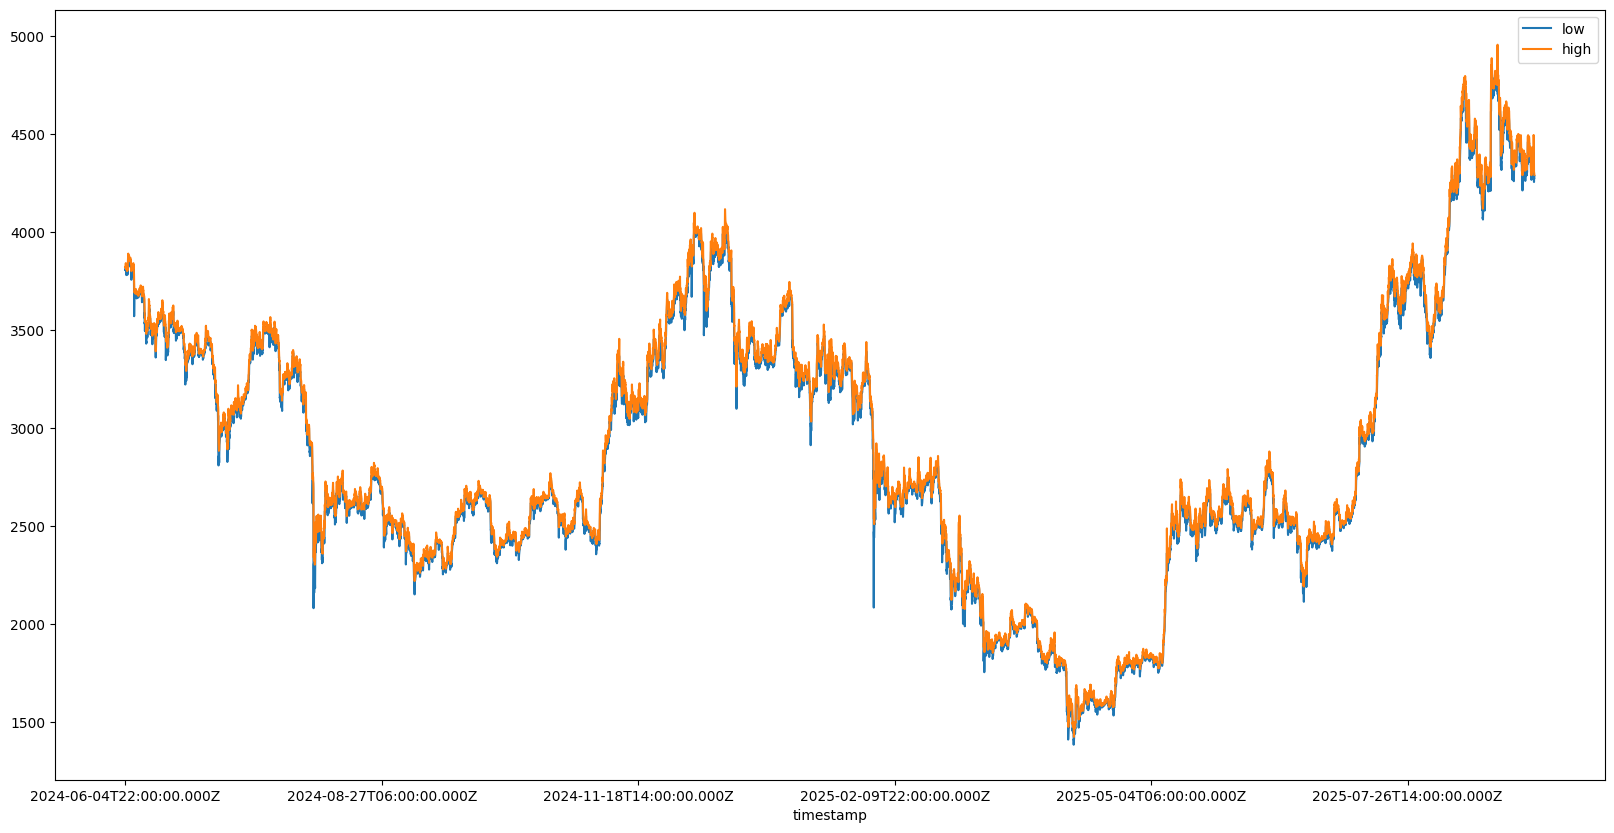

In [71]:
cf.plot(x='timestamp', y=['low', 'high'])

In [8]:
cf['rsi'] = talib.RSI(cf['close'])

In [9]:
xf = cf[['timestamp', 'close', 'volume', 'rsi', 'logret']].dropna()
R = xf['logret'].tolist()

n = 2

R = [R[i:i+n] for i in range(len(R))]
R = [sum(x) if len(x) == n else np.nan for x in R]
xf['futret'] = R

xf

,timestamp,close,volume,rsi,logret,futret
14,2025-09-12T01:45:00.000Z,4516.15,1,38.138925,-0.000124,-0.000755
15,2025-09-12T01:46:00.000Z,4515.59,22,37.545406,-0.000631,-0.000425
16,2025-09-12T01:47:00.000Z,4512.74,2,34.594752,0.000206,0.000206
17,2025-09-12T01:48:00.000Z,4513.67,26,36.352535,0.000000,-0.000456
18,2025-09-12T01:49:00.000Z,4513.67,0,36.352535,-0.000456,-0.000456
...,...,...,...,...,...,...
10984,2025-09-19T16:35:00.000Z,4482.20,55,44.257334,0.001583,0.000774
10985,2025-09-19T16:36:00.000Z,4489.30,22,57.745985,-0.000809,-0.001634
10986,2025-09-19T16:37:00.000Z,4485.67,190,50.956824,-0.000825,-0.000825
10987,2025-09-19T16:38:00.000Z,4481.97,15,45.132287,0.000000,0.000620


In [10]:
# xf.plot(x='rsi', y='futret', kind='scatter')

,grsi,up,count,prob_up
0,2.5,0,0,NaN
1,7.5,1,1,1.000000
2,12.5,8,10,0.800000
3,17.5,29,47,0.617021
4,22.5,81,142,0.570423
5,27.5,167,335,0.498507
6,32.5,337,696,0.484195
7,37.5,511,1102,0.463702
8,42.5,674,1490,0.452349
9,47.5,738,1622,0.454994


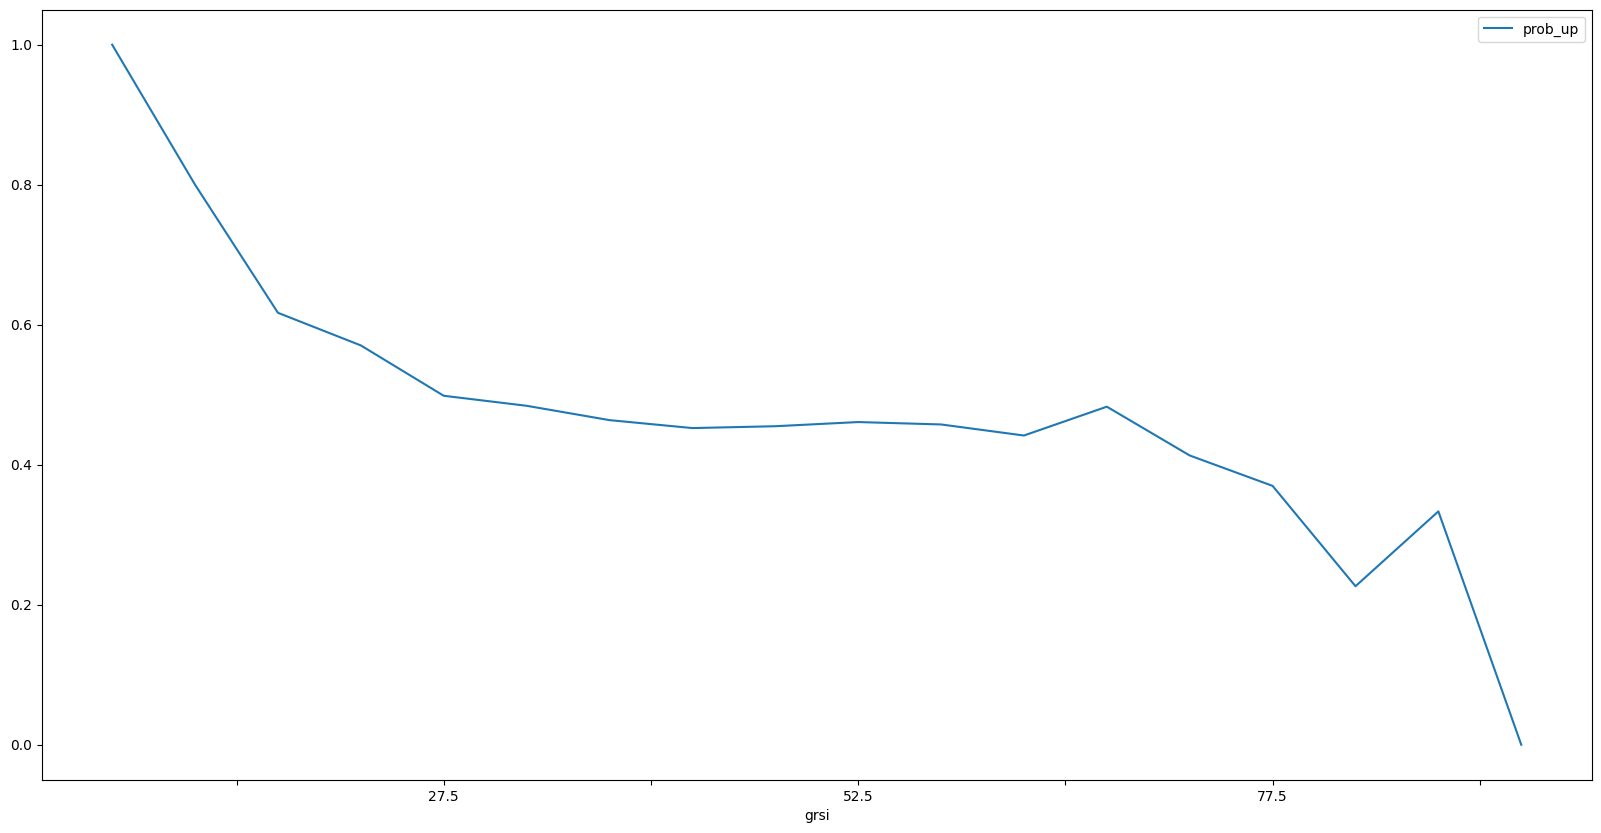

In [11]:
xf['grsi'] = pd.cut(xf['rsi'], np.arange(0, 101, 5)).apply(lambda x: x.mid)

xf['up'] = xf['futret'].apply(lambda x: 1 if x > 0 else 0)

yf = xf.groupby('grsi').agg({'up': sum, 'rsi': len}).reset_index()

yf.columns = ['grsi', 'up', 'count']
yf['prob_up'] = yf['up'] / yf['count']

yf.plot(x='grsi', y='prob_up')
yf

In [ ]:
# have function 0 - 100
# want adjust bid / ask

# when rsi <= 30, bid close to market bid
# when rsi >= 70, ask close to market ask



<Axes: xlabel='0'>

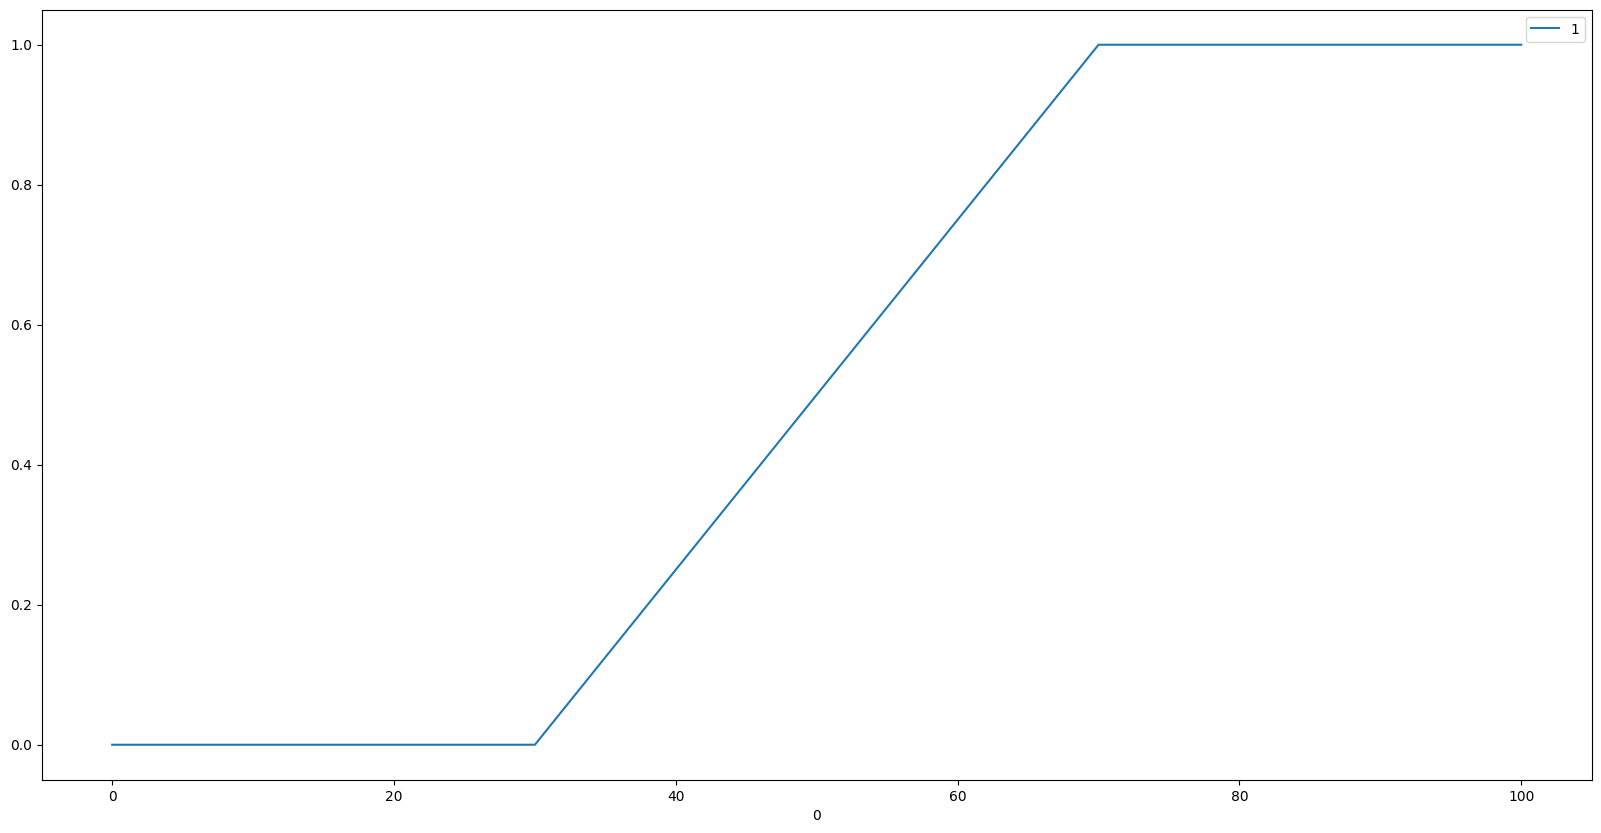

In [31]:
close = 4470

bps = 1 / 100 / 100

spread = 50 * bps * close


# spread

# rsi = 30

# bid = bid - spread * 0
# ask = ask + spread * 1


# rsi = 70

# bid = bid - spread * 1
# ask = ask + spread * 0

rsi = 70

func = lambda x: min(1, max(0, x - 30) / 40)

X = np.arange(0, 101, 1)


pd.DataFrame([[x, func(x)] for x in X]).plot(x=0, y=1)

In [ ]:
rsi = 30

func = rsi + (1 - rsi)



<Axes: >

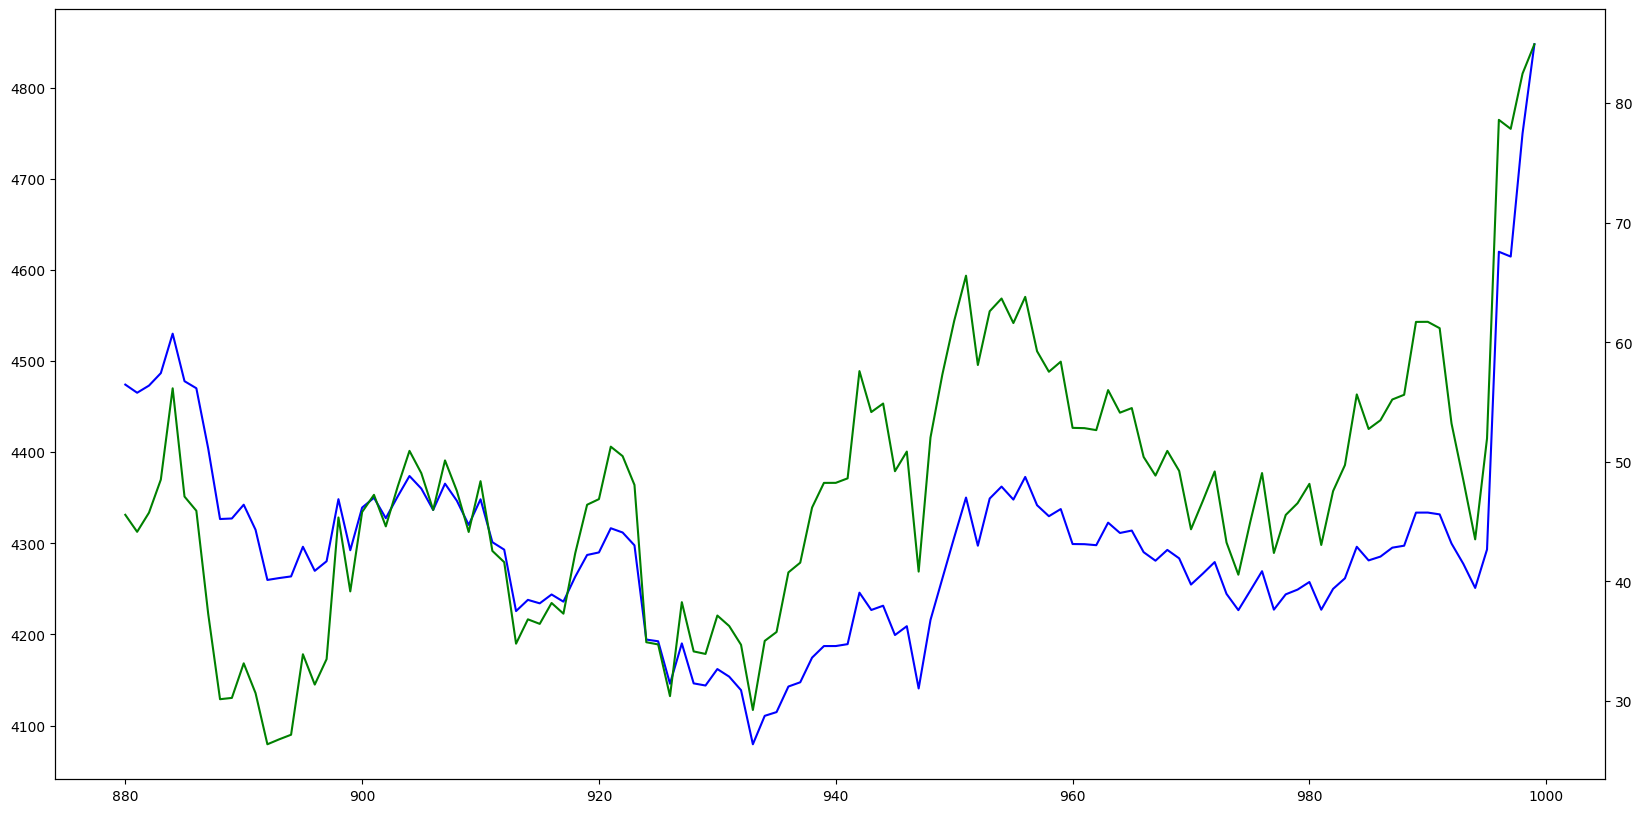

In [56]:
fig, ax1 = plt.subplots()

N = 120

ax2 = ax1.twinx()

cf['close'][-N:].plot(ax=ax1, style='b-')

cf['rsi'][-N:].plot(ax=ax2, style='g-')

In [57]:
cf

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,logret,abs_logret,rsi
0,2025-07-12T03:00:00.000Z,ETHUSD,2960.46,2973.00,2956.05,2958.59,1893,2920,2965.64,1,865964309,343.772743,1.019504e+06,0.003243,0.003243,NaN
1,2025-07-12T04:00:00.000Z,ETHUSD,2958.59,2970.64,2957.35,2968.20,1339,1940,2964.38,1,575088616,228.467346,6.772631e+05,-0.004911,0.004911,NaN
2,2025-07-12T05:00:00.000Z,ETHUSD,2968.20,2970.67,2943.68,2953.66,1293,5936,2954.36,3,1753703001,698.959339,2.064974e+06,0.000454,0.000454,NaN
3,2025-07-12T06:00:00.000Z,ETHUSD,2953.66,2959.90,2945.44,2955.00,588,1913,2952.95,1,564896617,225.120072,6.647654e+05,0.002923,0.002923,NaN
4,2025-07-12T07:00:00.000Z,ETHUSD,2955.00,2965.00,2948.16,2963.65,450,1858,2955.19,1,549072877,218.978563,6.471223e+05,0.000354,0.000354,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-08-22T14:00:00.000Z,ETHUSD,4251.03,4323.88,4237.84,4293.27,1147,6154,4286.80,1,2638090221,691.460487,2.964169e+06,0.073340,0.073340,51.963409
996,2025-08-22T15:00:00.000Z,ETHUSD,4293.27,4651.61,4295.91,4619.97,4514,38141,4527.00,1,17266386484,4374.741219,1.980735e+07,-0.001146,0.001146,78.598827
997,2025-08-22T16:00:00.000Z,ETHUSD,4619.97,4672.93,4614.68,4614.68,1187,9564,4651.42,7,4448604149,1115.618454,5.189195e+06,0.028868,0.028868,77.846138
998,2025-08-22T17:00:00.000Z,ETHUSD,4614.68,4783.67,4620.81,4749.84,1708,17704,4732.69,27,8378739984,2063.136011,9.764154e+06,0.020385,0.020385,82.466242


## Looking into [Kelly Criterion](https://en.wikipedia.org/wiki/Kelly_criterion)

<Axes: ylabel='Frequency'>

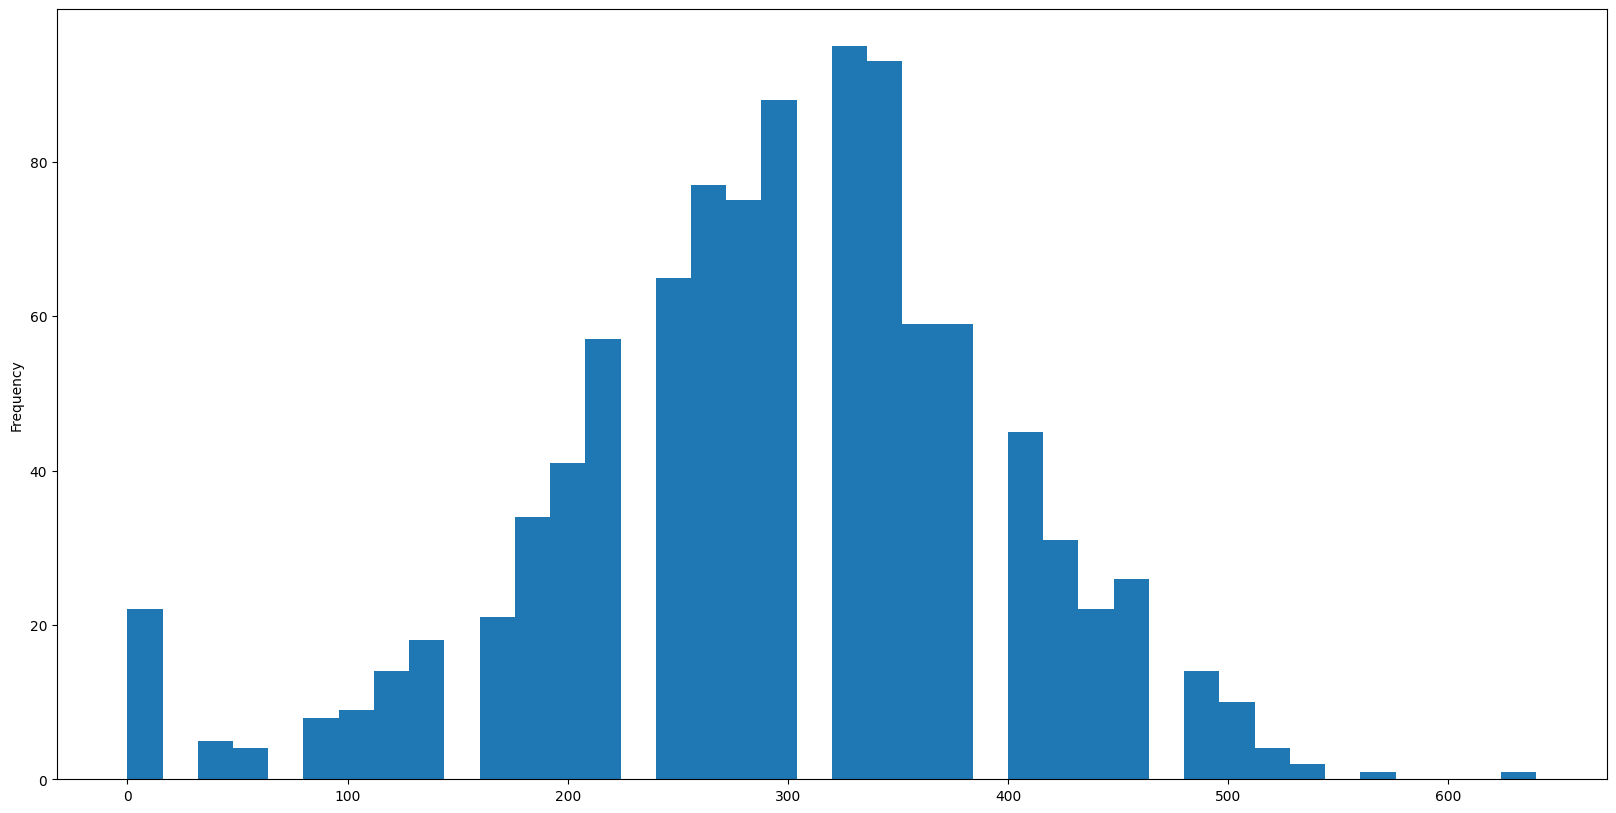

In [61]:
import random

coinflip = lambda: -1 if random.random() > 0.6 else 1

def trial(bets, bs):
    pot = 100
    n = 0
    while n < bets:
        pot += min(pot, bs) * coinflip()
        n += 1
        if pot <= 0: 
            break
    return pot
  

def trials_mcs(bs):
    return [trial(100, bs) for _ in range(1000)]


tf = pd.DataFrame(trials_mcs(10))
tf['count'] = 1
tf.columns = ['pot', 'count']

tf['pot'].plot(kind='hist', bins=40)
